# Natural Language Processing Project



We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [4]:
yelp= pd.read_csv('yelp.csv')

In [5]:
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


**Create a new column called "review length" which is the number of words in the text column.**

In [8]:
yelp['review length']=yelp['text'].apply(len)
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


# EDA

Let's explore the data



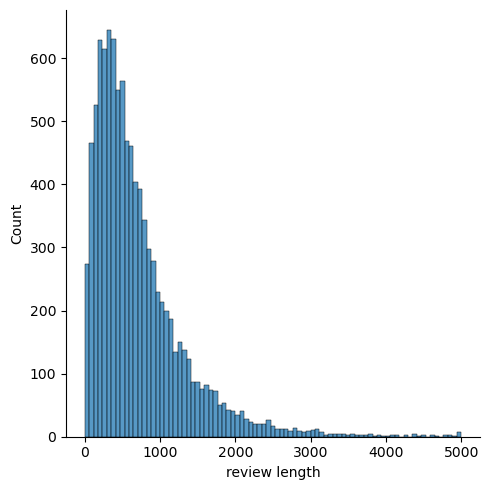

In [9]:
sns.displot(yelp['review length'])

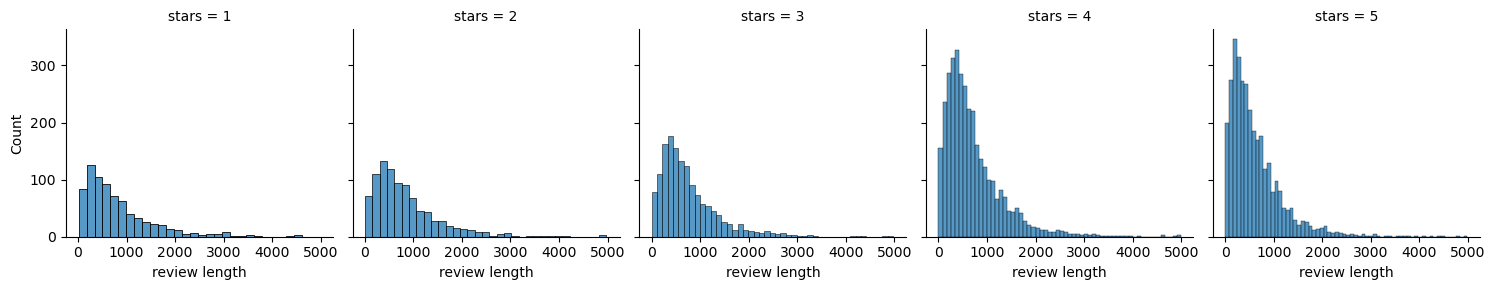

In [10]:
g = sns.FacetGrid(yelp,col='stars')
g.map(sns.histplot,'review length')

**Create a boxplot of text length for each star category.**

<Axes: ylabel='review length'>

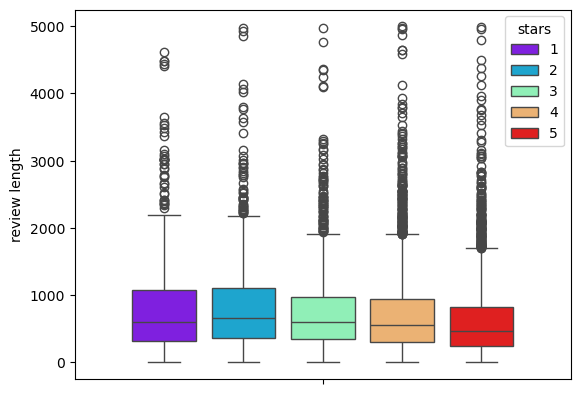

In [11]:
sns.boxplot(data=yelp,hue='stars',y='review length',palette='rainbow',legend='auto',gap=0.2)


**Create a countplot of the number of occurrences for each type of star rating.**

C:\Users\arjun\AppData\Local\Temp\ipykernel_17756\2116447000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

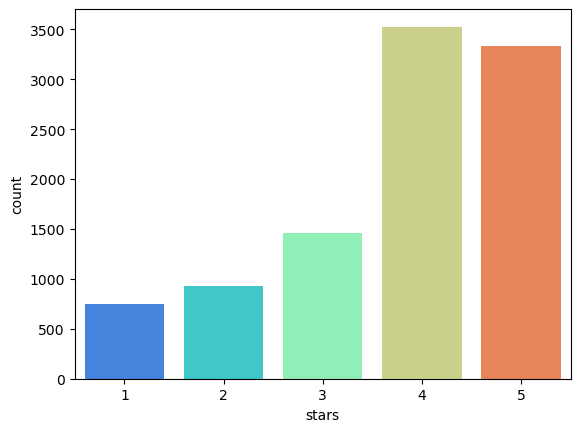

In [12]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [13]:
stars = yelp.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,review length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [14]:
stars.corr()

,cool,useful,funny,review length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
review length,-0.857664,0.699881,0.843461,1.000000


In [18]:
yelp[['stars','cool','useful','funny','review length']].corr()

,stars,cool,useful,funny,review length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
review length,-0.114674,0.241451,0.293975,0.251760,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

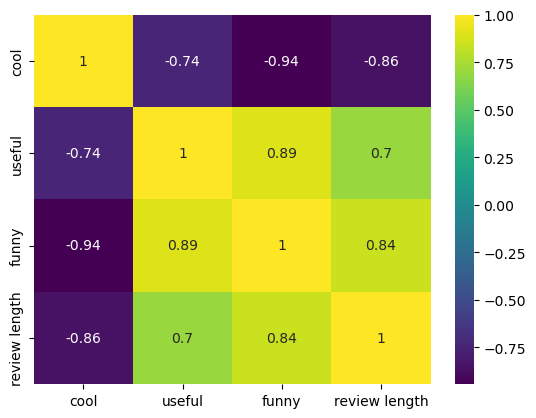

In [19]:
sns.heatmap(stars.corr(),annot=True,cmap='viridis')

## NLP Classification Task



In [20]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'review length'],
      dtype='object')

In [22]:
X=yelp['text']
y=yelp['stars']


**Import CountVectorizer and create a CountVectorizer object.**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

**Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [24]:
cv=CountVectorizer()
X=cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

**Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101**

In [25]:
from sklearn.model_selection import train_test_split

## Before that we are retrieving the column review length into a numpy array

**I am doing this because there is a correlation between the review length and stars label. The reviews with 4 or 5 stars are more lengthier than other reviews.**

In [26]:
review_len=yelp['review length']
review_len=review_len.values.reshape(-1,1)

In [27]:
review_len

array([[ 889],
       [1345],
       [  76],
       ...,
       [1425],
       [ 880],
       [ 461]], dtype=int64)

## We are horizontally stacking the numpy array after converting it into a 2d sparse matrix to the X csr matrix

In [28]:
from scipy.sparse import hstack, csr_matrix

# Convert review_lengths_array to a sparse matrix
review_lengths_sparse = csr_matrix(review_len)

# Combine the document-term matrix with the review length
X_new = hstack([X, review_lengths_sparse])


In [29]:
X_train, X_test, y_train, y_test=train_test_split(X_new,y,test_size=0.3,random_state=101)

## Training a Model



**Import MultinomialNB and create an instance of the estimator and call is nb **

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

**Now fit nb using the training data.**

In [31]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [32]:
predicts=nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test.**

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(predicts,y_test))

print('\n')

print(classification_report(predicts,y_test))

[[ 35   7   2   2   2]
 [ 29  11   5   1   2]
 [  9  19  25  10   5]
 [ 98 204 363 791 452]
 [ 49  32  48 260 539]]


              precision    recall  f1-score   support

           1       0.16      0.73      0.26        48
           2       0.04      0.23      0.07        48
           3       0.06      0.37      0.10        68
           4       0.74      0.41      0.53      1908
           5       0.54      0.58      0.56       928

    accuracy                           0.47      3000
   macro avg       0.31      0.46      0.30      3000
weighted avg       0.64      0.47      0.52      3000



## Adding review length as a feature improved f1-score by almost 100%

**There is an inherent class imbalance in the review data and this also affects the accuracy of the model. Although I haven't tried exploring these techniques. You can try such techniques (maybe SMOTE, Undersampling, or try to even play with features and get more insights) and see whether it improves the model performance or not.**